# Footy Tipping data analysis

We're going to take this super slowly.

This page is for data description. Graphs and regression output

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
# load in data
afl_data = pd.read_csv('afl_train.csv')
# drop if year 2005
afl_data = afl_data.drop(afl_data[afl_data.season==2005].index)
afl_data.fillna(0)
# make X, y variables
X = afl_data[['home_percentage', 'away_percentage', 
                       'home_last_season_percentage', 'away_last_season_percentage']].as_matrix()
y = afl_data[['home_team_win']].as_matrix()
m, n = X.shape
X_cols = ['home_percentage', 'away_percentage', 
                       'home_last_season_percentage', 'away_last_season_percentage']
y_col = ['home_team_win']

## Some scatter plots

OK so these aren't the best predictors!

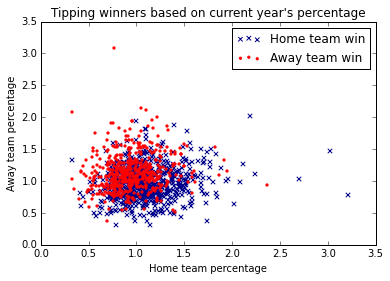

In [3]:
home_team_win = afl_data['home_team_win'] == 1
away_team_win = afl_data['home_team_win'] == 0
ax = afl_data[home_team_win].plot(kind='scatter', x='home_percentage', y='away_percentage',
                                  color='DarkBlue', marker='x', label='Home team win')
afl_data[away_team_win].plot(kind='scatter', x='home_percentage', y='away_percentage', 
                             color='red', marker = '.', label='Away team win', ax=ax)
plt.xlabel('Home team percentage')
plt.ylabel('Away team percentage')
plt.title("Tipping winners based on current year's percentage")
plt.legend()

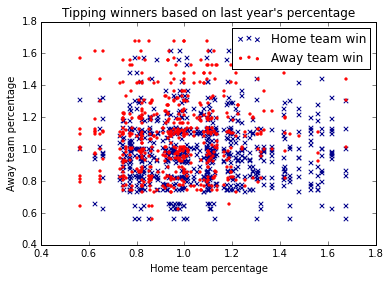

In [4]:
home_team_win = afl_data['home_team_win'] == 1
away_team_win = afl_data['home_team_win'] == 0
ax = afl_data[home_team_win].plot(kind='scatter', x='home_last_season_percentage', y='away_last_season_percentage',
                                  color='DarkBlue', marker='x', label='Home team win')
afl_data[away_team_win].plot(kind='scatter', x='home_last_season_percentage', y='away_last_season_percentage', 
                             color='red', marker = '.', label='Away team win', ax=ax)
plt.xlabel('Home team percentage')
plt.ylabel('Away team percentage')
plt.title("Tipping winners based on last year's percentage")
plt.legend()

## Some density plots

It looks like last year's percentage predicts wins better than current year's percentage!

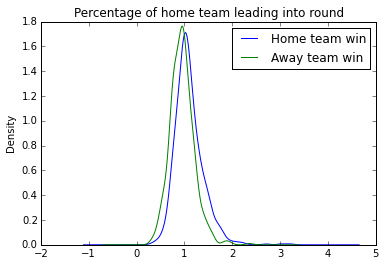

In [5]:
# creating density plots
home_team_win = afl_data['home_team_win'] == 1
away_team_win = afl_data['home_team_win'] == 0 
afl_data[home_team_win]['home_percentage'].plot(kind='density', label='Home team win') 
afl_data[away_team_win]['home_percentage'].plot(kind='density', label='Away team win')
plt.title('Percentage of home team leading into round')
plt.legend()

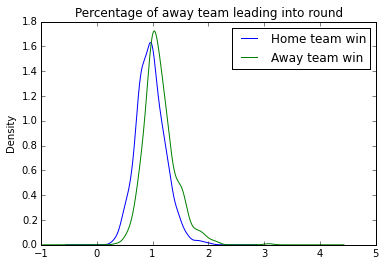

In [6]:
home_team_win = afl_data['home_team_win'] == 1
away_team_win = afl_data['home_team_win'] == 0 
afl_data[home_team_win]['away_percentage'].plot(kind='density', label='Home team win') 
afl_data[away_team_win]['away_percentage'].plot(kind='density', label='Away team win')
plt.title('Percentage of away team leading into round')
plt.legend()

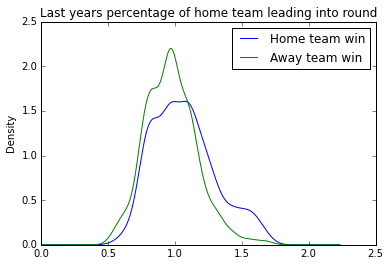

In [7]:
home_team_win = afl_data['home_team_win'] == 1
away_team_win = afl_data['home_team_win'] == 0 
afl_data[home_team_win]['home_last_season_percentage'].plot(kind='density', label='Home team win') 
afl_data[away_team_win]['home_last_season_percentage'].plot(kind='density', label='Away team win')
plt.title('Last years percentage of home team leading into round')
plt.legend()

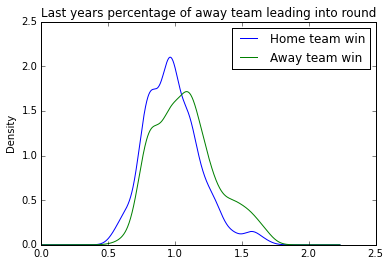

In [8]:
home_team_win = afl_data['home_team_win'] == 1
away_team_win = afl_data['home_team_win'] == 0 
afl_data[home_team_win]['away_last_season_percentage'].plot(kind='density', label='Home team win') 
afl_data[away_team_win]['away_last_season_percentage'].plot(kind='density', label='Away team win')
plt.title('Last years percentage of away team leading into round')
plt.legend()

## Linear regression

Well the linear fit is better than expected!

In [9]:
formula = 'home_team_win ~ home_percentage + away_percentage \
        + home_last_season_percentage + away_last_season_percentage'
results = sm.ols(formula, data = afl_data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          home_team_win   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     67.11
Date:                Wed, 19 Aug 2015   Prob (F-statistic):           1.61e-51
Time:                        15:19:49   Log-Likelihood:                -785.90
No. Observations:                1265   AIC:                             1582.
Df Residuals:                    1260   BIC:                             1608.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                       0.5990      0.089      6.702      0.000         0.424     0.774
home_percentage                 0.3763      0.049      7.751      0.000         0.281     0.472
away_percentage                -0.4278      0.050     -8.550      0.000        -0.526    -0.330
home_last_season_percentage     0.2754      0.063      4.377      0.000         0.152     0.399
away_last_season_percentage    -0.2568      0.063     -4.053      0.000        -0.381    -0.132
==============================================================================
Omnibus:                        6.036   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.049   Jarque-Bera (JB):              107.413
Skew:                          -0.169   Prob(JB):                     4.74e-24
Kurtosis:                       1.613   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logit regression

Similar results

In [11]:
logit_mod = sm.Logit(y, X)
result = logit_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.585944
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1265
Model:                          Logit   Df Residuals:                     1261
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Aug 2015   Pseudo R-squ.:                  0.1449
Time:                        15:20:10   Log-Likelihood:                -741.22
converged:                       True   LL-Null:                       -866.81
                                        LLR p-value:                 3.625e-54
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.1771      0.278      7.819      0.000         1.631     2.723
x2            -2.1907      0.269     -8.140      0.000        -2.718    -1.663
x3             1.4364      0.291      4.936      0.000         0.866     2.007
x4            -1.1093      0.283     -3.926      0.000        -1.663    -0.555
==============================================================================
"""